# Python for Webscraping
* SOC 590: Big Data and Population Processes
* 17th October 2016

## Tutorial 1: Webscraping a table to .csv

* import relevant modules
* standard library modules:
    * [os](https://docs.python.org/3/library/os.html)
    * [csv](https://docs.python.org/3/library/csv.html)
    * [urllib](https://docs.python.org/3/library/urllib.html)
    * [webbrowser](https://docs.python.org/3/library/webbrowser.html)
* open source modules:
    * [numpy](http://www.numpy.org/)
    * [pandas](http://pandas.pydata.org)
    * [matplotlib](http://matplotlib.org/)
    * [altair](https://github.com/altair-viz/altair)
    * [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [1]:
import os
import csv
import urllib
import webbrowser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from altair import * 
from bs4 import BeautifulSoup
%matplotlib inline

* make a data folder

In [2]:
if not os.path.exists('../data/'):
    os.makedirs('../data/')

* open List of popular websites on Wikipedia

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_most_popular_websites'
webbrowser.open_new_tab(url)

True

* make a soup for List of popular websites table with [html table tags](http://www.w3schools.com/html/html_tables.asp)
* save soup as `wiki_popular_sites.csv`

In [4]:
soup = BeautifulSoup(urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_most_popular_websites'), "lxml")

# <th> tag: defines a header cell in a table
# <tr> tag: defines a row in a table 
# <td> tag: defines a cell in a table
headers = [header.text for header in soup.findAll('th')]
rows = []
headers
for row in soup.find_all('tr')[1:]:
    rows.append([val.text for val in row.find_all_next('td',limit=6)])
    

with open('../data/wiki_popular_sites.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(row for row in rows if row)

* read in `wiki_popular_sites.csv` with `pandas`

In [5]:
wiki_popular_sites = pd.read_csv("../data/wiki_popular_sites.csv")
wiki_popular_sites.head(10)

,Site,Domain,"Alexa top 100 websites (As of September 4, 2016)[3]","SimilarWeb top 100 websites (As of September 4, 2016)[4]",Type,Principal country
0,Google,google.com,1,2,Internet services and products,U.S.
1,YouTube,youtube.com,2,3,Video sharing,U.S.
2,Facebook,facebook.com,3,1,Social network,U.S.
3,Baidu,baidu.com,4,16,Search engine,China
4,Yahoo!,yahoo.com,5,5,Portal and media,U.S.
5,Amazon,amazon.com,6,10,E-commerce and cloud computing,U.S.
6,Wikipedia,wikipedia.org,7,7,Encyclopedia,U.S.
7,Tencent QQ,qq.com,8,41,Portal,China
8,Google India,google.co.in,9,14,Search engine,India
9,Twitter,twitter.com,10,8,Social network,U.S.


In [6]:
wiki_popular_sites.columns

Index(['Site', 'Domain',
       'Alexa top 100 websites\n(As of September 4, 2016)[3]',
       'SimilarWeb top 100 websites\n(As of September 4, 2016)[4]', 'Type',
       '\nPrincipal country\n'],
      dtype='object')

* rename columns

In [7]:
columns = ["Site", "Domain", "Alexa top 100 websites", "SimilarWeb top 100 websites", "Type", "Principal country"]
wiki_popular_sites.columns = columns
wiki_popular_sites.columns

Index(['Site', 'Domain', 'Alexa top 100 websites',
       'SimilarWeb top 100 websites', 'Type', 'Principal country'],
      dtype='object')

* basic descriptives

In [8]:
wiki_popular_sites.describe()

,Site,Domain,Alexa top 100 websites,SimilarWeb top 100 websites,Type,Principal country
count,124,124,124,124,124,124
unique,124,124,124,121,60,31
top,CNTV,office.com,30447,N/A[notes 1],Search engine,U.S.
freq,1,1,1,3,26,48


In [9]:
wiki_popular_sites['Type'].unique()

array(['Internet services and products', 'Video sharing', 'Social network',
       'Search engine', 'Portal and media',
       'E-commerce and cloud computing', 'Encyclopedia', 'Portal',
       'Email, web services and software suite', 'Online shopping',
       'Photo sharing and social media', 'Portal and instant messaging',
       'Professional Social network', 'Web directories',
       'social news networking, entertainment',
       'Online auctions and shopping',
       'URL shortening for links on Twitter', 'Retail',
       'Internet security and anti-trojan software', 'E-commerce',
       'Social media', 'Online advertising network',
       'Streaming TV and movies', 'Software and technology',
       'Blogging and social media', 'Newspaper', 'Payment system',
       'Blogging', 'Image sharing', 'Question and answer site',
       'Social Networking', 'Technology and software',
       'Source code hosting service', 'Search Engine', 'Pornography',
       'Film, TV show, and video ga

In [10]:
wiki_popular_sites['Principal country'].unique()

array([' U.S.', ' China', ' India', ' Japan', ' Russia', ' Germany', ' UK',
       ' France', ' Brazil', ' Italy', ' Spain', ' Korea', ' Mexico',
       ' Canada', ' Hong Kong', ' Cyprus', ' Turkey', ' Indonesia',
       ' Poland', ' Taiwan', ' Netherlands', ' Australia', ' Costa Rica',
       ' Vietnam', ' U.K.', ' Thailand', ' Argentina', ' Poland[5]',
       ' Ukraine', ' Colombia', '\xa0Philippines'], dtype=object)

* use `pandas` groupby function to group websites by Type and Principal coutry
* .iloc subsets the result to only inlcude the first two columns by index

In [11]:
grouped_sites = wiki_popular_sites.groupby(['Type','Principal country']).count()

In [12]:
grouped_sites.iloc[:,0:1]

,,Site
Type,Principal country,
Ad serving,U.S.,1
Advertising,U.S.,1
Blogging,U.S.,2
Blogging and social media,U.S.,1
Booking engine,Netherlands,1
Classified advertising,U.S.,1
Content marketing,U.S.,1
Disney portal,U.S.,1
E-commerce,China,1


* create a pivot table aggregating all countries in the table

In [13]:
by_country = wiki_popular_sites.pivot_table('Type', aggfunc='count', columns='Principal country')
by_country.head(10)

Principal country
 Argentina      1
 Australia      1
 Brazil         3
 Canada         3
 China         23
 Colombia       1
 Costa Rica     2
 Cyprus         1
 France         1
 Germany        2
Name: Type, dtype: int64

* make a historgram of countries represented in the Wikipedia data set

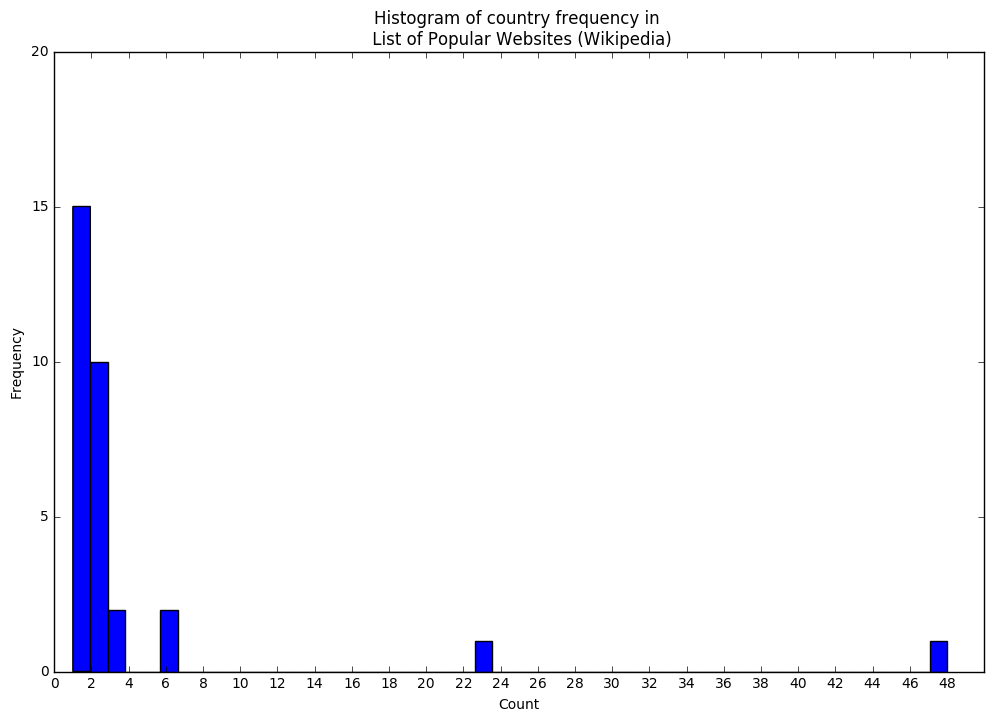

In [14]:
fig, ax = plt.subplots(1, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)
plt.hist(by_country, bins = 50, color='blue')
plt.xticks(np.arange(0, by_country.max()+1, 2))
plt.yticks(np.arange(0, by_country.value_counts().max()+10, 5))
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of country frequency in \n List of Popular Websites (Wikipedia)')
plt.show()

* convert by_country series to a data frame for plotting with altair

In [15]:
by_country_df = pd.DataFrame(by_country)

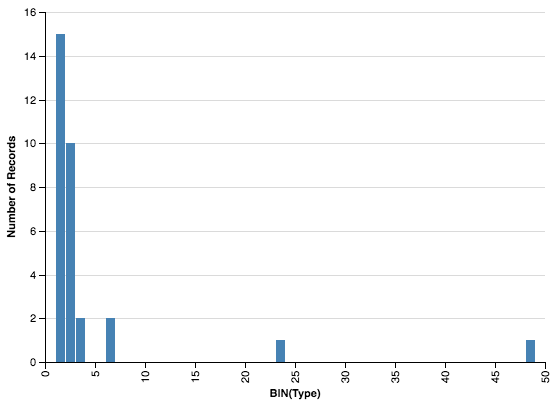

In [16]:
Chart(by_country_df).mark_bar().encode(
    x=X('Type:Q',
        bin=Bin(
            maxbins=50.0,
        ),
    ),
    y='count(*):Q',
       
)
